## Codigo

#### Testing

Vemos que la cosa corre, y cómo corre

In [1]:
from main import *
from exp_runner import *
from college_ip import *
import matplotlib.pyplot as plt

In [2]:
# test config
test_college_ip = CollegeIP('exactas.uba.ar')

print(f"Clean url: {test_college_ip.clean_url} \n")
print(f"IP: {test_college_ip.address} \n")
print(f"URL info: {test_college_ip.info} \n")

rt_test_config = {'ip': test_college_ip, 'retry_qty': 3, 'max_ttl': 5}

Clean url: exactas.uba.ar 

IP: 157.92.32.18 

URL info: {'status': 'success', 'country': 'Argentina', 'countryCode': 'AR', 'region': 'C', 'regionName': 'Buenos Aires F.D.', 'city': 'Buenos Aires', 'zip': '1871', 'lat': -34.6021, 'lon': -58.3845, 'timezone': 'America/Argentina/Buenos_Aires', 'isp': 'Universidad Nacional de Buenos Aires', 'org': 'Universidad Nacional de Buenos Aires', 'as': 'AS3449 Universidad Nacional de Buenos Aires', 'query': '157.92.32.18', 'continentCode': 'SA'} 



In [3]:
er = ExpRunner(rt_test_config, jobname='example', prefer_loading_saved_data=False, save_data=False)
route_tracer = er.run_exp()

Running with 3 retries and 5 max_ttl with IP 157.92.32.18 

Running retry 0
Running retry 1
Running retry 2

get rtt
1 192.168.0.1 [177.29973793029785, 46.022891998291016, 82.9629898071289]

process rtt
[(1, 102.09521, 192.168.0.1)]

filter processed rtt
[(1, 102.09521, 192.168.0.1)]

calculate differences
[{'src': 0, 'dst': 1, 'rtt_diff': 102.09521, 'is_continental_jump': None}]


### Configuraciones

Donde ponemos qué universidades nos interesan, y hacemos las configuraciones para que corran

In [4]:
urls = {
    'ARGENTINA': "exactas.uba.ar",

    'BOLIVIA': "www.uatf.edu.bo",
    'PERU': "www.unmsm.edu.pe",
    'BRASIL': "www5.usp.br",

    'CANADA': "www.uvic.ca",
    'USA': "www.harvard.edu",

    'UK': "129.67.242.155",

    'SUIZA': "ethz.ch",
    'RUSIA': "www.msu.ru",
    'ISRAEL': "www.technion.ac.il",

    'CHINA': "www.tsinghua.edu.cn",

    'AUSTRALIA': "www.anu.edu.au",
}

for college_country, url in urls.items():
    cip = CollegeIP(url)
    print('College country: {}, real host country: {}'.format(college_country, cip.info['country']))

College country: ARGENTINA, real host country: Argentina
College country: BOLIVIA, real host country: Bolivia
College country: PERU, real host country: Peru
College country: BRASIL, real host country: Brazil
College country: CANADA, real host country: Canada
College country: USA, real host country: United States
College country: UK, real host country: United Kingdom
College country: SUIZA, real host country: Switzerland
College country: RUSIA, real host country: Russia
College country: ISRAEL, real host country: Israel
College country: CHINA, real host country: China
College country: AUSTRALIA, real host country: Australia


# Experimentos

In [5]:
from matplotlib import cm
color = cm.inferno(np.linspace(.20, .90, 16))

In [6]:
RETRY_QTY = 30
MAX_TTL = 30
JOBNAMES = ["cgiudice_night", "dolmedo", "frosende", "rbarylko2"]

rt_jobnames = {}

for jobname in JOBNAMES:
    route_tracer_d = {}
    for college_country, url in urls.items():
        cip = CollegeIP(url)
        print('Running college country: {}'.format(college_country))

        rt_config = {'ip': cip, 'retry_qty': RETRY_QTY, 'max_ttl': MAX_TTL}
        er = ExpRunner(rt_config, jobname=jobname, prefer_loading_saved_data=True, save_data=True)
        route_tracer = er.run_exp(verbose=False)
        route_tracer_d[college_country] = route_tracer
    rt_jobnames[jobname] = route_tracer_d

Running college country: ARGENTINA
File was found. Loading saved data
Running college country: BOLIVIA
File was found. Loading saved data
Running college country: PERU
File was found. Loading saved data
Running college country: BRASIL
File was found. Loading saved data
Running college country: CANADA
File was found. Loading saved data
Running college country: USA
File was found. Loading saved data
Running college country: UK
File was found. Loading saved data
Running college country: SUIZA
File was found. Loading saved data
Running college country: RUSIA
File was found. Loading saved data
Running college country: ISRAEL
File was found. Loading saved data
Running college country: CHINA
File was found. Loading saved data
Running college country: AUSTRALIA
File was found. Loading saved data
Running college country: ARGENTINA
File was found. Loading saved data
Running college country: BOLIVIA
File was found. Loading saved data
Running college country: PERU
File was found. Loading saved dat

### Introducción

In [7]:
import pandas as pd

def country_values(dic):
    return {v['dst']: v['rtt_diff'] for v in dic}

countries = {}
for country in urls.keys():
    jobs_results = []
    for jobname in rt_jobnames.keys():
        route_tracer_d = rt_jobnames[jobname]
        jobs_results.append(country_values(route_tracer_d[country].differences))
    countries[country] = jobs_results

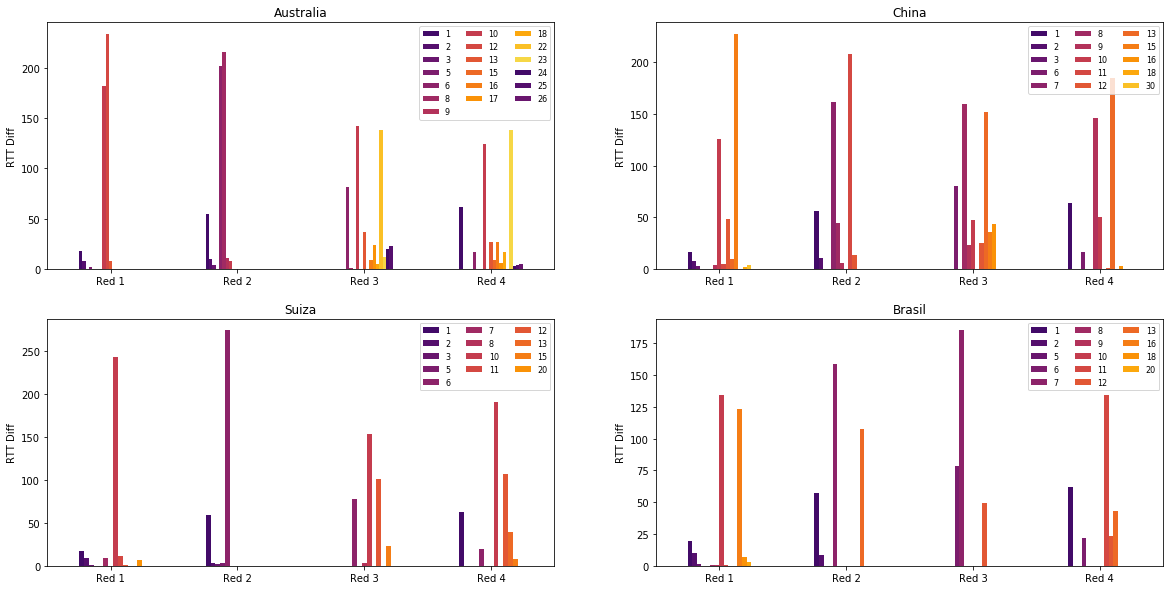

In [8]:
NAMES = ["Red 1", "Red 2", "Red 3", "Red 4"]

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(20,10))
australia = pd.DataFrame(countries['AUSTRALIA']).fillna(0)
australia.index = NAMES
australia = australia.reindex(sorted(australia.columns), axis=1)
australia.plot.bar(rot=0, color=color, ax=ax1)
ax1.set_title('Australia')
ax1.set_ylabel('RTT Diff')
ax1.legend(ncol=3, fontsize=8)

china = pd.DataFrame(countries['CHINA']).fillna(0)
china.index = NAMES
china = china.reindex(sorted(china.columns), axis=1)
china.plot.bar(rot=0, color=color, ax=ax2)
ax2.set_title('China')
ax2.set_ylabel('RTT Diff')
ax2.legend(ncol=3, fontsize=8)


suiza = pd.DataFrame(countries['SUIZA']).fillna(0)
suiza.index = NAMES
suiza = suiza.reindex(sorted(suiza.columns), axis=1)
suiza.plot.bar(rot=0, color=color, ax=ax3)
ax3.set_title('Suiza')
ax3.set_ylabel('RTT Diff')
ax3.legend(ncol=3, fontsize=8)


brasil = pd.DataFrame(countries['BRASIL']).fillna(0)
brasil.index = NAMES
brasil = brasil.reindex(sorted(brasil.columns), axis=1)
brasil.plot.bar(rot=0, color=color, ax=ax4)
ax4.set_title('Brasil')
ax4.set_ylabel('RTT Diff')
ax4.legend(ncol=3, fontsize=8)
plt.show()

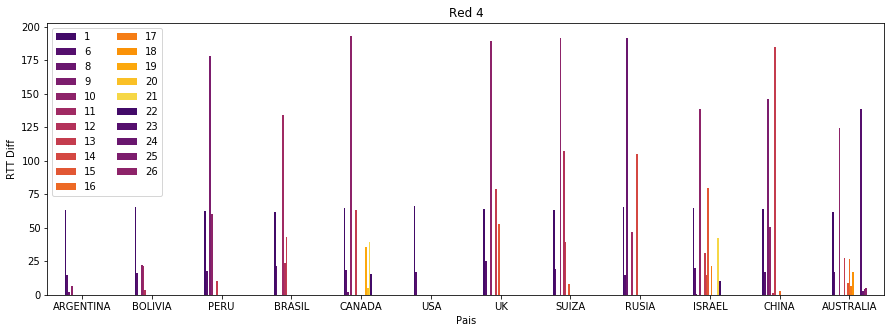

In [9]:
rb_countries = []
route_tracer_d = rt_jobnames['rbarylko2']
for country in urls.keys():
    rb_countries.append(country_values(route_tracer_d[country].differences))

countries_df = pd.DataFrame(rb_countries).fillna(0)
countries_df.index = urls.keys()
countries_df = countries_df.reindex(sorted(countries_df.columns), axis=1)

countries_df.plot.bar(rot=0, color=color, figsize=(15,5))
plt.title('Red 4')
plt.xlabel('Pais')
plt.ylabel('RTT Diff')
plt.legend(ncol=2)
plt.show()

Viendo el gráfico de arriba, y para facilitar el análisis de información de aquí en más, nos quedamos con Canada, Suiza, Rusia, China y Australia

In [10]:
ANALYSIS_COUNTRIES = {"CANADA", "RUSIA", "CHINA", "AUSTRALIA"}
util_route_tracer_d = {k:v for k,v in route_tracer_d.items() if k in ANALYSIS_COUNTRIES}

In [103]:
SRC = 7
RawIP(list(util_route_tracer_d["CHINA"].responses[SRC].keys())[0]).info

{'status': 'success',
 'country': 'Italy',
 'countryCode': 'IT',
 'region': '62',
 'regionName': 'Latium',
 'city': 'Rome',
 'zip': '00187',
 'lat': 41.8638,
 'lon': 12.497,
 'timezone': 'Europe/Rome',
 'isp': 'TELECOM ITALIA SPARKLE S.p.A.',
 'org': 'SEA-BONE',
 'as': 'AS6762 TELECOM ITALIA SPARKLE S.p.A.',
 'query': '185.70.203.22',
 'continentCode': 'EU'}

In [102]:
list(util_route_tracer_d["CHINA"].responses[7].keys())[0]

'185.70.203.22'

In [104]:
util_route_tracer_d["CHINA"].responses

defaultdict(<function main.<lambda>()>,
            {1: defaultdict(list,
                         {'192.168.0.1': [62.05248832702637,
                           68.76635551452637,
                           57.389259338378906,
                           53.93218994140625,
                           81.51483535766602,
                           103.14440727233887,
                           53.788185119628906,
                           86.62891387939453,
                           54.08143997192383,
                           77.40283012390137,
                           82.16214179992676,
                           71.61903381347656,
                           57.90352821350098,
                           50.03476142883301,
                           50.301313400268555,
                           49.56531524658203,
                           41.51463508605957,
                           45.957088470458984,
                           72.98922538757324,
                           58.07

### Analisis saltos perdidos

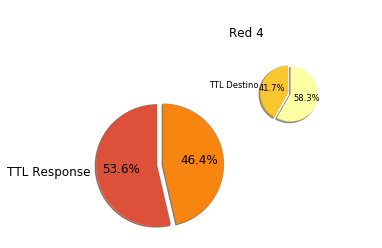

In [68]:
def draw_pie(hops,no_hops, arrived, no_arrived, title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    totals = hops + no_hops

    ax1.pie([hops/totals, no_hops/totals], explode = (0.05, 0.05), labels=['TTL Response', ''], autopct='%1.1f%%',
           shadow=True, startangle=90, colors=pie_colors[0:2], textprops={'fontsize': 12})
    
    totals = arrived + no_arrived
    
    ax2.pie([arrived/totals, no_arrived/totals], explode = (0.02, 0.02), labels=['TTL Destino', ''], autopct='%1.1f%%',
           shadow=True, startangle=90, colors=pie_colors[2:4], textprops={'size': 'smaller'}, radius=0.4)
    ax2.set_position([0.4, 0.3, 0.4, 0.9])

    fig.suptitle(title)
    
def count_hops(rt_jobname):
    total_hops, total_no_hops, total_arrived, total_no_arrived = 0, 0, 0, 0
    for country in rt_jobname.keys():
        country_responses = rt_jobname[country].responses
        hops = list(country_responses.keys())
        last_hop_ips = list(country_responses[hops[-1]].keys())
        if not any(map(lambda hop: hop == rt_jobname[country].ip.address, last_hop_ips)):
            total_no_arrived = total_no_arrived + 1
            total_no_hops = total_no_hops + (30 - hops[-1])
        else:
            total_arrived = total_arrived + 1
            total_hops = total_hops + (30 - hops[-1])
        total_hops = total_hops + len(hops)
        total_no_hops = total_no_hops + (hops[-1] - len(hops))
    return total_hops, total_no_hops, total_arrived, total_no_arrived

JOBNAMES = ["cgiudice_night", "dolmedo", "frosende", "rbarylko2"]
pie_colors = cm.inferno(np.linspace(.60, 1, 4))
hops, no_hops, arrived, no_arrived = count_hops(rt_jobnames['rbarylko2'])
draw_pie(hops, no_hops, arrived, no_arrived, 'Red 4')

### Saltos intercontinentales

In [86]:
# Armo diccionario de coordenadas

coordinates_d = {}
for country in util_route_tracer_d.keys():
    ips = [ip for _, _, ip in route_tracer_d[country].top_responses_ips]
    coordinates = [[i.info['lat'], i.info['lon']] for i in ips if i.info['status'] == 'success']
    coordinates_d[country] = coordinates

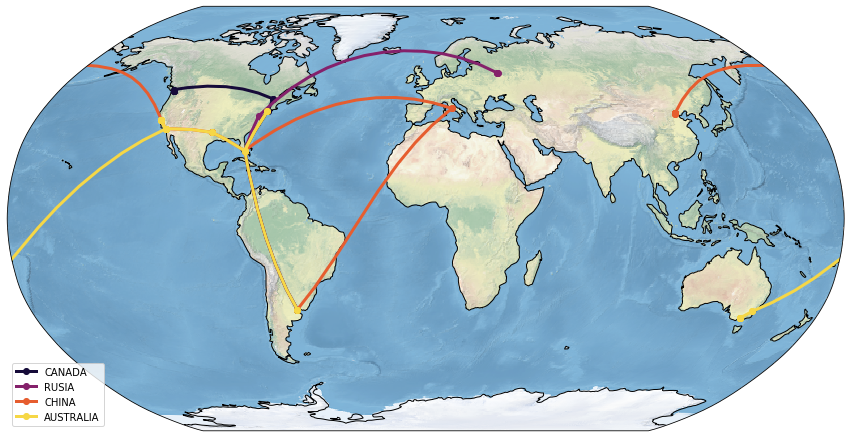

In [87]:
import cartopy.crs as ccrs

plt.figure(figsize=(15,10))

map_proj = ccrs.Robinson()
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()

colors = cm.inferno(np.linspace(.10, .90, len(util_route_tracer_d)))
map_colors = dict(zip(util_route_tracer_d.keys(), colors))
point_proj = ccrs.Geodetic()

for country, coord in coordinates_d.items():
    for i in range(len(coord)-1):
        ax.plot([coord[i][1], coord[i+1][1]], [coord[i][0], coord[i+1][0]], transform=point_proj, color=map_colors[country], linewidth=3, marker='o', label=country if i == 0 else "")
plt.legend()

plt.show()

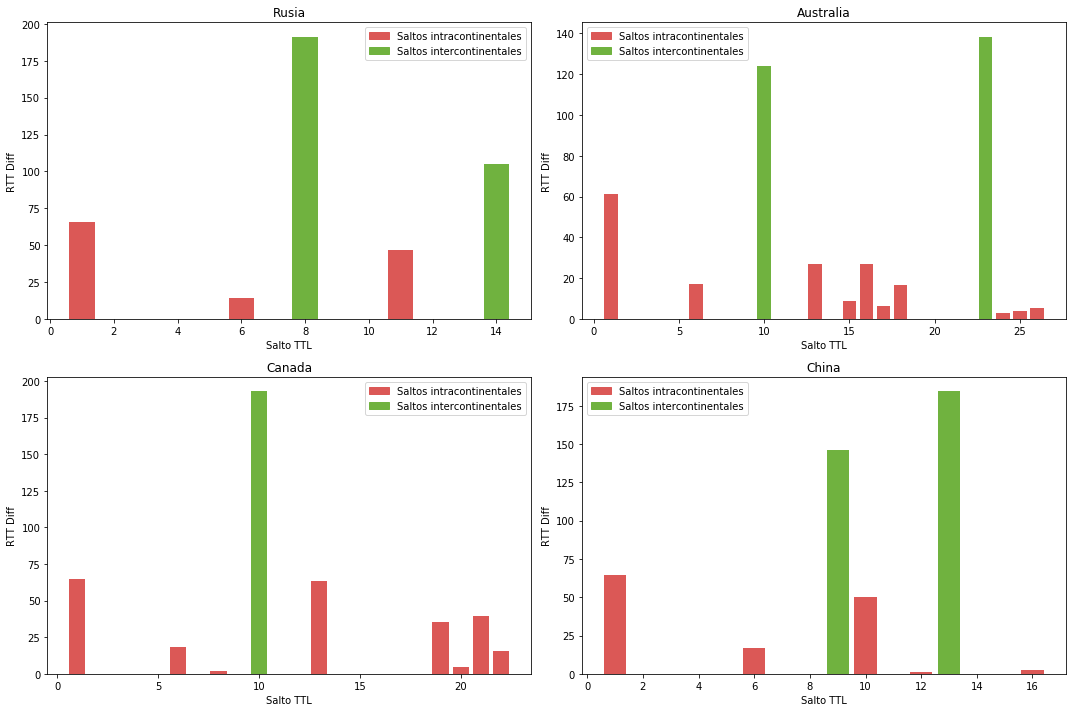

In [19]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

rusia = util_route_tracer_d['RUSIA']
australia = util_route_tracer_d['AUSTRALIA']
canada = util_route_tracer_d['CANADA']
china = util_route_tracer_d['CHINA']

fig, ((ax1, ax2), (ax3,ax4))= plt.subplots(2, 2, figsize=(15,10))

green = mcd.XKCD_COLORS['xkcd:nasty green']
red = mcd.XKCD_COLORS['xkcd:pastel red']

red_patch = mpatches.Patch(color=red, label='Saltos intracontinentales')
green_patch = mpatches.Patch(color=green, label='Saltos intercontinentales')

ax = ax1
df = pd.DataFrame(rusia.differences).fillna(False)
df = df.drop(columns=['src'])
jumpcolors = [green if continental_j else red for continental_j in df.is_continental_jump]
ax.bar(df.dst, df.rtt_diff, color = jumpcolors)
ax.set_xlabel('Salto TTL')
ax.set_ylabel('RTT Diff')
ax.set_title('Rusia')
ax.legend(handles=[red_patch, green_patch])

ax = ax2
df = pd.DataFrame(australia.differences).fillna(False)
df = df.drop(columns=['src'])
jumpcolors = [green if continental_j else red for continental_j in df.is_continental_jump]
ax.bar(df.dst, df.rtt_diff, color = jumpcolors)
ax.set_xlabel('Salto TTL')
ax.set_ylabel('RTT Diff')
ax.set_title('Australia')
ax.legend(handles=[red_patch, green_patch])

ax = ax3
df = pd.DataFrame(canada.differences).fillna(False)
df = df.drop(columns=['src'])
jumpcolors = [green if continental_j else red for continental_j in df.is_continental_jump]
ax.bar(df.dst, df.rtt_diff, color = jumpcolors)
ax.set_xlabel('Salto TTL')
ax.set_ylabel('RTT Diff')
ax.set_title('Canada')
ax.legend(handles=[red_patch, green_patch])

ax = ax4
df = pd.DataFrame(china.differences).fillna(False)
df = df.drop(columns=['src'])
jumpcolors = [green if continental_j else red for continental_j in df.is_continental_jump]
ax.bar(df.dst, df.rtt_diff, color = jumpcolors)
ax.set_xlabel('Salto TTL')
ax.set_ylabel('RTT Diff')
ax.set_title('China')
ax.legend(handles=[red_patch, green_patch])

plt.tight_layout()
plt.show()

### Anomalias